In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import string

In [3]:
df=pd.read_csv("fake_job_postings.csv")

In [4]:
df.sample(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
12666,12667,Substance Abuse Counselor (Danville Center),"US, VA, Danville",NaN,NaN,Crossroads Treatment Centers is a nationally-a...,"Are you a professional, detailed, multi-tasker...",The most qualified candidates will possess a B...,Crossroads offers a comprehensive benefits pac...,0,1,1,Full-time,Associate,Bachelor's Degree,Medical Practice,Health Care Provider,0
8574,8575,"Alliance Data - Director, Pricing & Profit Ana...","US, OH, Columbus",NaN,NaN,Pricing Recruiters is the leading global resou...,Qualifications &amp; ResponsibilitiesThe Direc...,KnowledgeThe business functions and profitabil...,About Alliance DataAlliance Data (NYSE: ADS) a...,0,1,0,Full-time,NaN,NaN,NaN,NaN,0
1546,1547,Business Development Director,"US, CA, Santa Clara",NaN,0-0,Human capital is usually the biggest asset and...,This is an exclusive retained search being con...,Business development experience in the world o...,Executive Level Compensation –250K+,0,1,1,Full-time,Director,Bachelor's Degree,Consumer Electronics,Business Development,0
1012,1013,Customer Support Receptionist / Agent - Englis...,"EE, 37, Tallinn",Customer Support,NaN,Want to build a 21st century financial service...,Our fantastic Customer Support team is growing...,We're looking for somebody to- Support our won...,NaN,0,1,1,NaN,NaN,NaN,NaN,NaN,0
10552,10553,Personal Assistant,"GB, , London",NaN,NaN,We believe cities are complicated. And your mo...,Citymapper is looking for a Personal Assistant...,#NAME?,NaN,0,1,1,NaN,NaN,NaN,NaN,NaN,0
13623,13624,IT Project Manager,"US, TX, Temple",IT Services,40000-70000,"At McLane Intel, we believe that everyone shou...","At McLane Intelligent Solutions, we attribute ...",Experience in providing customer service on-si...,All qualified McLane Intelligent Solutions emp...,0,1,1,Full-time,Associate,Associate Degree,Information Technology and Services,Information Technology,0
14568,14569,Cyber Intelligence Analyst Internship Scheme,"GB, LND, Canary Wharf",NaN,NaN,Digital Shadows is a cyber threat intelligence...,We provide cyber monitoring and threat intelli...,A passion for cyber security and intelligence ...,£17K PA (equivalent to XX a day),0,1,0,Part-time,Internship,Bachelor's Degree,Information Technology and Services,Data Analyst,0
402,403,Inside Sales Professional-Omaha,"US, NE, Omaha",NaN,NaN,"ABC Supply Co., Inc. is the nation’s largest w...","As a Sales Representative, you will provide as...","As a Sales Representative, you must have the a...",Your benefits package as a Sales Representativ...,0,1,0,Full-time,NaN,NaN,Building Materials,Sales,0
6301,6302,HSE Manager,"US, TX, Houston",NaN,NaN,NaN,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes Exper...,We offer• Friendly colleagues in an industry w...,0,0,0,NaN,NaN,NaN,Oil & Energy,Other,1
13735,13736,Marketing & Social Media Coordinator (15hrs/week),"US, CA, San Francisco",NaN,30000-32000,Innovative streetwear and clothes you can play...,"Prize Pony is a new, fun clothing company with...","Build audience on Twitter, Facebook, Instagram...","Payroll position with W-2, not a W-9 or 1099 f...",1,1,1,Part-time,Entry level,Unspecified,Apparel & Fashion,Marketing,0


In [5]:
df.shape

(17880, 18)

In [6]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [7]:
#dropping columns that are unnecessary
#dropping salary_range becuase it has too many null values
df.drop(['job_id','salary_range','telecommuting','has_company_logo','has_questions'],axis=1,inplace=True)

In [8]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
#replacing NAN values with blank space
df.fillna('',inplace=True)

In [10]:
#helps in identifying if a specific column is categorical or numerical
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   department           17880 non-null  object
 3   company_profile      17880 non-null  object
 4   description          17880 non-null  object
 5   requirements         17880 non-null  object
 6   benefits             17880 non-null  object
 7   employment_type      17880 non-null  object
 8   required_experience  17880 non-null  object
 9   required_education   17880 non-null  object
 10  industry             17880 non-null  object
 11  function             17880 non-null  object
 12  fraudulent           17880 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 1.8+ MB


<Axes: ylabel='count'>

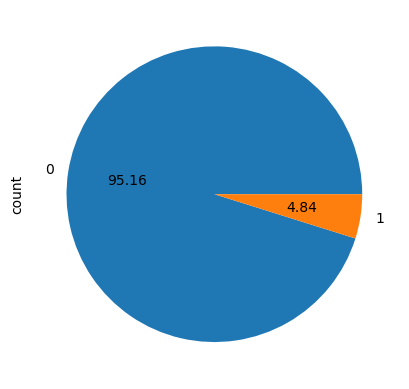

In [11]:
#estimating categories in column fraudulent
df['fraudulent'].value_counts().plot(kind='pie', autopct='%.2f')
#0->REAL, 1->FAKE

In [12]:
#create dependant and independant features
columns=df.columns.tolist()
#filter column fradulent(dependant feature) from the list of columns(independant features)
columns=[c for c in columns if c not in ["fraudulent"]]
target="fraudulent"
#random state
state=np.random.RandomState(42)
X= df[columns]
Y=df["fraudulent"]
X_outliers= state.uniform(low=0,high=1,size=(X.shape[0], X.shape[1]))
print(X.shape)
print(Y.shape)

#since there is imbalance, 95% real jobs and 4% fake we will balance it using imblearn
from imblearn.under_sampling import RandomUnderSampler

under_sampler=RandomUnderSampler()
X_res, y_res= under_sampler.fit_resample(X,Y)

df1= pd.DataFrame(X_res)
df3=pd.DataFrame(y_res)

result= pd.concat([df1,df3],axis=1,join='inner')
result.reset_index(drop=True, inplace=True)
display(result)
df=result;

(17880, 12)
(17880,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Account Executive (Spanish Speaking),"PL, MZ, Warsaw",Sales,,Positionly sp. z o.o. is a company that provid...,Fluent in Spanish. (Native speakers preferred....,"Attractive salary, depending on your experienc...",Full-time,Mid-Senior level,,Internet,Sales,0
1,Connectivity Engineer,"GR, I, Athens",Engineering,Upstream’s mission is to revolutionise the way...,Normal 0 false false false E...,Normal 0 false false false E...,Normal 0 false false false E...,Full-time,,,,Engineering,0
2,Lead Python Django Engineer,"GB, LND, London",Engineering,,We are looking for a lead Django engineer to j...,Must havePython/DjangoReal world experience bu...,"CultureWe really care about making work fun, t...",Full-time,,Unspecified,Information Technology and Services,Engineering,0
3,Linux Server Administrator,"IN, MP, Indore",Server Administration,"Being into the IT domain for over 4 years, Wal...","Installation of all Unix, Linux.Source code an...","Expertise in C,C++ Language.Should be able to ...",Flexible Work Timings,Full-time,Entry level,Bachelor's Degree,Information Technology and Services,Information Technology,0
4,Manager of Operations,"US, DC, Washington",Operations,VisaHQ hires a diverse and internationally min...,We are looking for a professional Operations M...,3+ years of experience as operations managerAd...,Strong on-boarding and sustained support allow...,Full-time,Mid-Senior level,Bachelor's Degree,"Leisure, Travel & Tourism",Sales,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,Student Positions Part-Time and Full-Time.You ...,,,Part-time,,,,,1
1728,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,,,,,,1
1729,Android Developer,"PL, MZ, Warsaw",,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,,,,,,1
1730,Payroll Clerk,"US, NY, New York",,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


# EXPLORATORY DATA ANALYSIS (EDA)

<Axes: ylabel='count'>

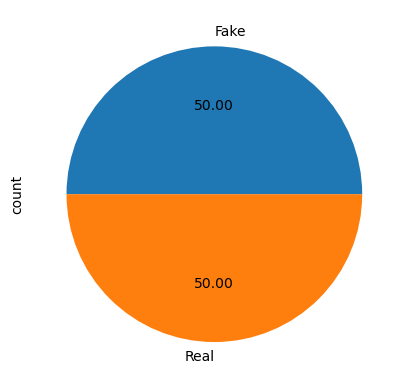

In [13]:
labels='Fake' , 'Real'
df['fraudulent'].value_counts().plot(kind='pie', autopct='%.2f', labels=labels)


In [14]:
#visualizing number of job postings by countries, using the location column for the same
def split(location):
    l=location.split(',') #splits into['US','CA', 'Los Angeles']
    return l[0] #returns US
    
df['country'] = df.location.apply(split)
df['country']

0       PL
1       GR
2       GB
3       IN
4       US
        ..
1727    US
1728    AU
1729    PL
1730    US
1731    US
Name: country, Length: 1732, dtype: object

In [15]:
df['country'].nunique() #this will give the number of counties present in df

53

In [16]:
#considering only top 10 countries that post jobs, value_counts by default arranges countries in descending order
df['country'].value_counts()[:11]

country
US    1235
GB     151
GR      56
AU      52
        35
CA      35
IN      16
DE      15
NZ      14
MY      12
QA       7
Name: count, dtype: int64

Text(0.5, 0, 'Countries')

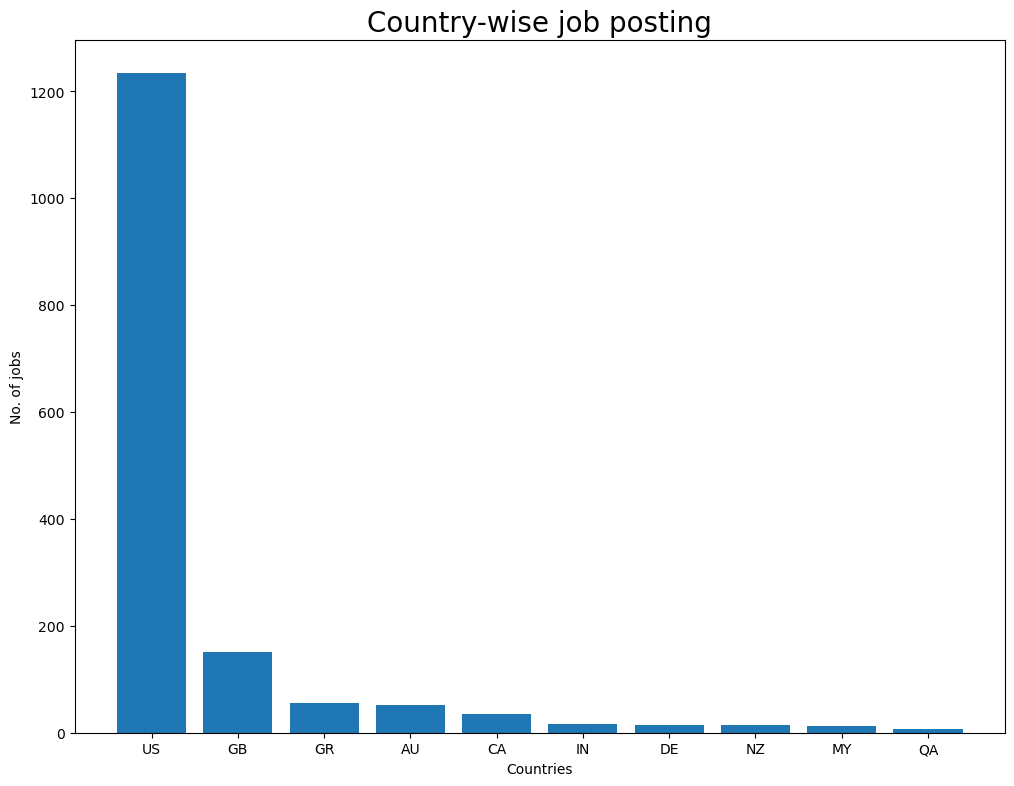

In [17]:
country=dict(df.country.value_counts()[:11])
del country['']
plt.figure(figsize=(12,9))
plt.title('Country-wise job posting', size=20)
plt.bar(country.keys(),country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

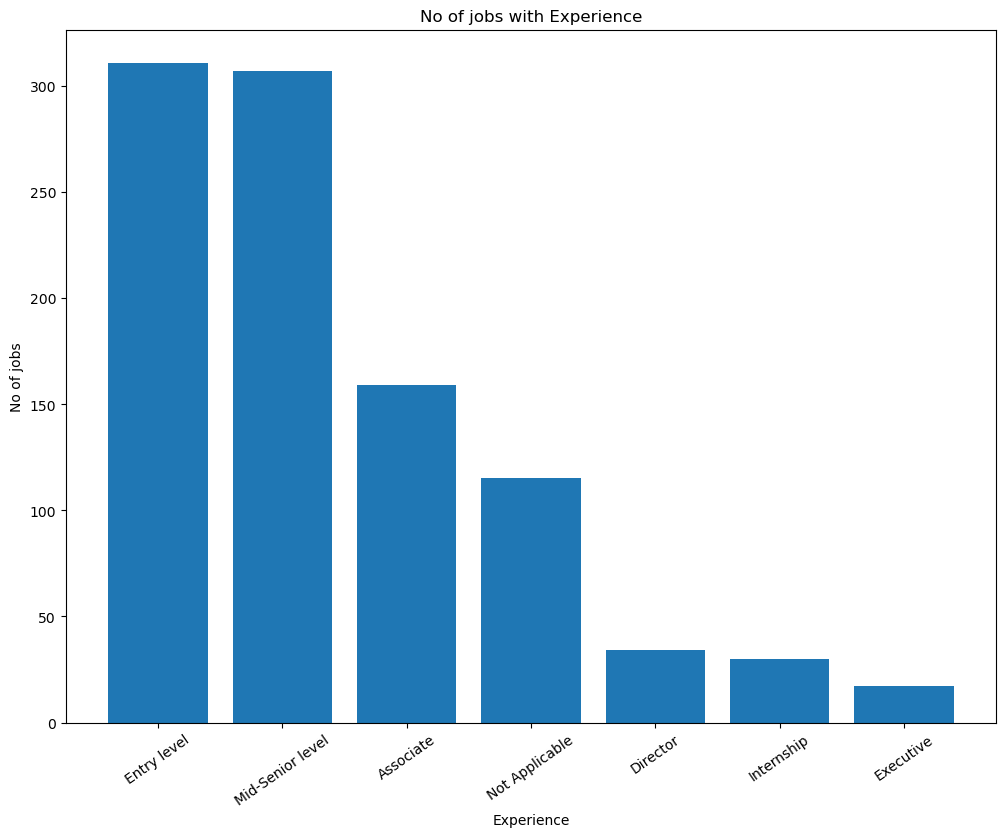

In [18]:
#visualizin jobs based on experience
experience= dict(df.required_experience.value_counts())
del experience['']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No of jobs with Experience')
plt.xlabel('Experience',size=10)
plt.ylabel('No of jobs',size=10)
plt.xticks(rotation=35)
plt.show()

In [19]:
#combining all the columns into a single column
df['text']= df['title']+ ' '+ df['location']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+ ' ' +df['benefits']+' '+df['industry']

del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']
del df['employment_type']

In [20]:
df.head()

,fraudulent,text
0,0,"Account Executive (Spanish Speaking) PL, MZ, W..."
1,0,"Connectivity Engineer GR, I, Athens Upstream’s..."
2,0,"Lead Python Django Engineer GB, LND, London W..."
3,0,"Linux Server Administrator IN, MP, Indore Bein..."
4,0,"Manager of Operations US, DC, Washington VisaH..."


In [21]:
from wordcloud import WordCloud
#visualizing all the words in our df using wordcloud plot
all_words = ''.join([text for text in df["text"]])

In [22]:
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=120).generate(all_words)

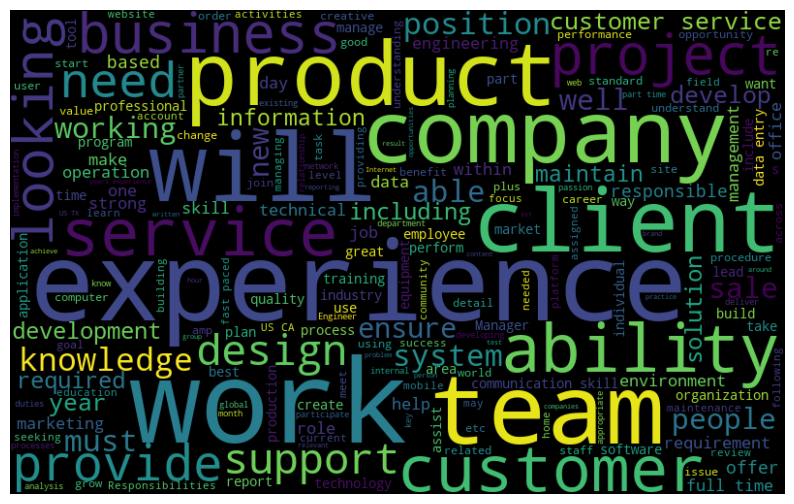

In [23]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
#common words used in real job posting texts

real_job=''.join([text for text in df['text'][df['fraudulent']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=120).generate(real_job)
                  
                  

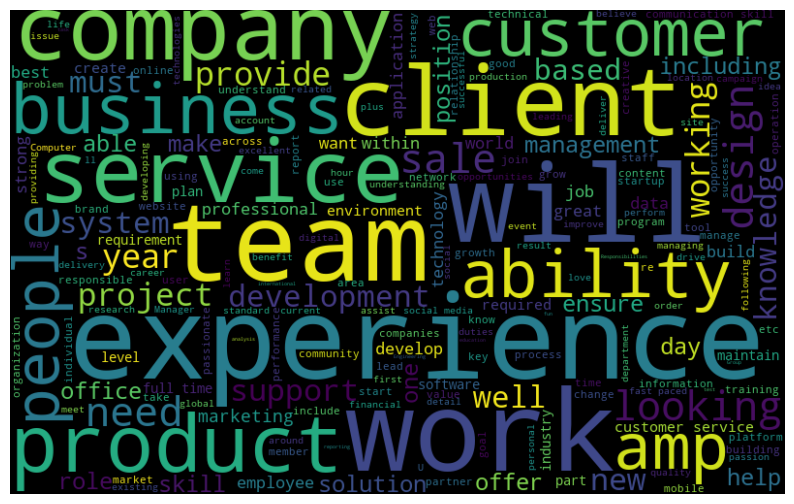

In [25]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
fake_job= ''.join([text for text in df['text'][df['fraudulent']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=120).generate(fake_job)

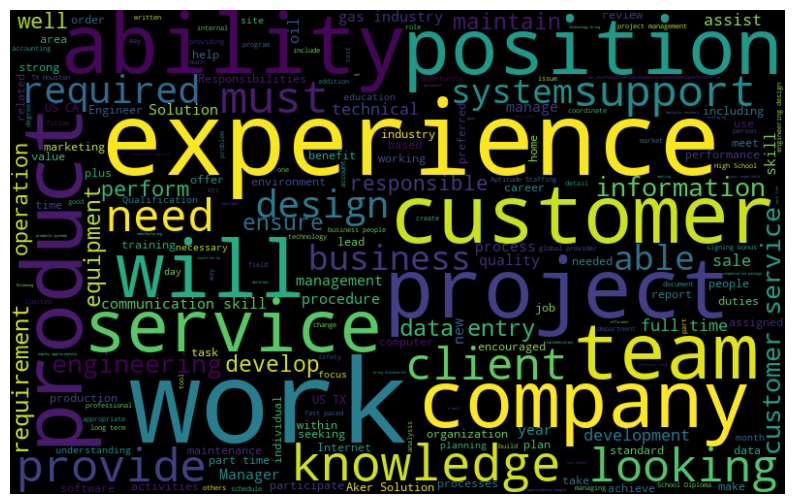

In [27]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# DATA PREPROCESSING

In [28]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [30]:
stop_words=set(stopwords.words("english"))

In [31]:
#converting all text to lower case
df['text']=df['text'].apply(lambda x:x.lower())

In [32]:
#removing stopwords from the corpus
df['text']=df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop_words)]))

In [33]:
df['text'][0]

"account executive (spanish speaking) pl, mz, warsaw positionly sp. z o.o. company provides highest quality seo software 2000+ companies worldwide. product offers simple accurate insights seo campaign’s performance combined smoothest user-#url_989a62eb5f13943ca5d8e5bab71f64b6866e106b2294419f56fff8b8e31d49a0# development company supported number vc firms germany poland. rapidly growing company currently looking young, ambitious hard working sales person already experience field sales customer support. we’re looking someone consultative sales approach, successful track record growing inside sales polished presentation skills. fit profile let us know, want team!what responsibilities:following assisting trialling customers adopt service negotiating required win customersanswering customer's questions product itselfdeveloping improving sales strategiesacquiring new customers maintaining good relationships existing onesongoing co-operation team members fluent spanish. (native speakers prefer

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(df.text, df.fraudulent, test_size=0.3)

In [35]:
print(y_train)
print(X_train)

122     0
746     0
345     0
814     0
1446    1
       ..
1056    1
1357    1
54      0
1517    1
1172    1
Name: fraudulent, Length: 1212, dtype: int64
122     back office junior php developer ee, 37, talli...
746     payments analyst gr, , #url_e837e935106c9b32df...
345     product marketing specialist nz, n, auckland v...
814     part-time warehouse help us, az, scottsdale le...
1446    sales/marketing/advertising au, qld, gold coas...
                              ...                        
1056    customer service rep. us, tx, 77619 customer s...
1357    ust testing technician us, ca, bakersfield, ca...
54      data warehouse/etl architect us, ga, atlanta 2...
1517    office assistant iii us, fl, jacksonville esse...
1172    market operations manager us, tx, austin accio...
Name: text, Length: 1212, dtype: object


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
vect=CountVectorizer()

In [38]:
vect.fit(X_train)

CountVectorizer()

In [39]:
X_train_dtm = vect.transform(X_train)

In [40]:
X_train_dtm

<1212x20892 sparse matrix of type '<class 'numpy.int64'>'
	with 201135 stored elements in Compressed Sparse Row format>

In [41]:
print(X_train_dtm)

  (0, 1)	1
  (0, 37)	1
  (0, 192)	1
  (0, 305)	1
  (0, 361)	2
  (0, 378)	1
  (0, 476)	1
  (0, 791)	2
  (0, 804)	1
  (0, 892)	1
  (0, 930)	1
  (0, 933)	4
  (0, 1167)	1
  (0, 1284)	1
  (0, 1611)	1
  (0, 1790)	1
  (0, 2014)	4
  (0, 2031)	1
  (0, 2275)	1
  (0, 2335)	1
  (0, 2374)	1
  (0, 2390)	1
  (0, 2391)	1
  (0, 2605)	1
  (0, 2614)	1
  :	:
  (1211, 18035)	2
  (1211, 18099)	1
  (1211, 18423)	1
  (1211, 18428)	1
  (1211, 18497)	1
  (1211, 18546)	2
  (1211, 18630)	2
  (1211, 18698)	1
  (1211, 18944)	1
  (1211, 18945)	2
  (1211, 19089)	1
  (1211, 19185)	1
  (1211, 19186)	1
  (1211, 19517)	1
  (1211, 19710)	1
  (1211, 19836)	1
  (1211, 20012)	1
  (1211, 20042)	1
  (1211, 20289)	1
  (1211, 20298)	2
  (1211, 20311)	1
  (1211, 20461)	1
  (1211, 20466)	2
  (1211, 20488)	1
  (1211, 20491)	1


In [42]:
X_test_dtm=vect.transform(X_test)
X_test_dtm

<520x20892 sparse matrix of type '<class 'numpy.int64'>'
	with 83476 stored elements in Compressed Sparse Row format>

# Model Building and Evaluation 

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
     

In [44]:
nb=MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 15.6 ms
Wall time: 78.4 ms


MultinomialNB()

In [45]:
y_pred_nb=nb.predict(X_test_dtm)
print(y_pred_nb)

[0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0
 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1
 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0
 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0
 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1
 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1
 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 0 1 

In [46]:
accuracy_score(y_test, y_pred_nb)

0.9

In [47]:
print("Classification Report\n")
print(classification_report(y_test, y_pred_nb))

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       276
           1       0.88      0.91      0.90       244

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520



Confusion Matrix

[[246  30]
 [ 22 222]]


Text(95.72222222222221, 0.5, 'Truth')

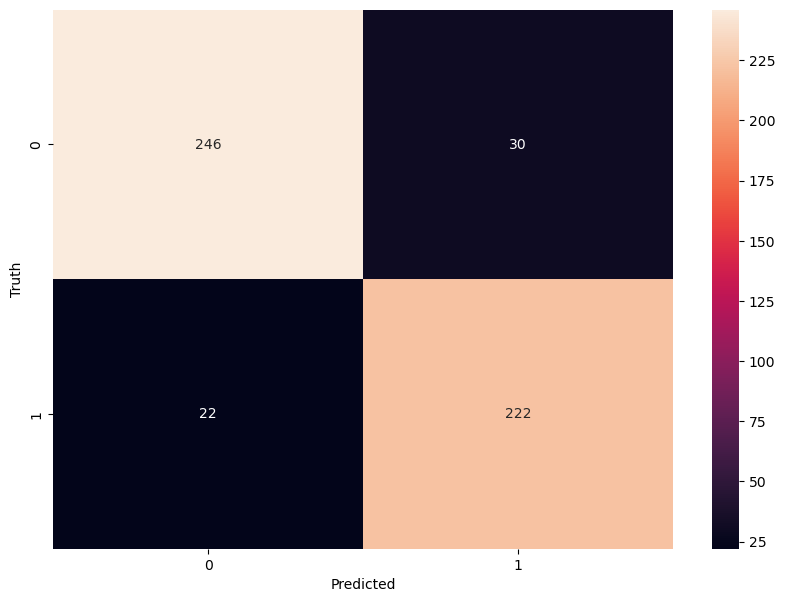

In [48]:
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))


cm = confusion_matrix(y_test,y_pred_nb)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Decision Tree Classifier

In [49]:
dt = DecisionTreeClassifier()


In [50]:
%time dt.fit(X_train_dtm, y_train)

CPU times: total: 2.28 s
Wall time: 2.76 s


DecisionTreeClassifier()

In [51]:
y_pred_class= dt.predict(X_test_dtm)

In [52]:
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))


Classification Accuracy: 0.8269230769230769


In [53]:
print("Classification Report\n")
print(classification_report(y_test, y_pred_nb))

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       276
           1       0.88      0.91      0.90       244

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520



Text(95.72222222222221, 0.5, 'Truth')

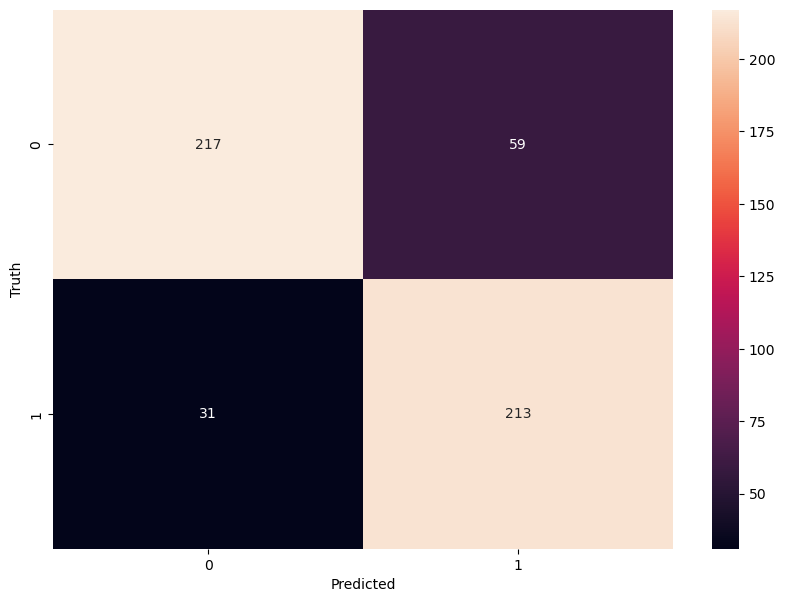

In [54]:
import seaborn as sn
cm=confusion_matrix(y_test,y_pred_class)

plt.figure(figsize= (10,7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Building a predective system

In [55]:
X_test

233     unity/c# engineer us, il, chicago synapse game...
1307    property preservation field crews us, md, rock...
343     early years practitioner - full part time gb, ...
217     security audit candidate us, ny, new york titl...
1671    ninestone group focused two parts: helping inc...
                              ...                        
459     medication order clerk us, fl, jacksonville jo...
763     ui designer us, ga, savannah focus lab, llc bo...
1493    data entry admin/clerical positions - work hom...
321     solar installer us, ca, san diego solar electr...
468     director managed care us, ny, new york recombi...
Name: text, Length: 520, dtype: object

In [56]:
print(X_test[1617])

csr us, , gary cartwright established cartwright property management 2007 help manage hoas created development company would develop residential multi-family community. developed numerous single-family, duplex, townhome apartment communities. gary general contractor holding unlimited building license licensed real estate agent north carolina. gary also partner sister real estate company. experience builder, developer, real estate sales company owner beneficial assisting rental hoa clients managing rentals hoa communities. seeking customer service reps company.


In [ ]:
input_text= X_test[1617]
input_data_features=vect.transform([input_text])
prediction=nb.predict(input_data_features)

if(prediction[0]==1):
    print("Fraudulent job")
else:
    print("Real job")

Fraudulent job


In [58]:
#testing  model
print(y_test[1617])

1


The predicted result is correct

In [59]:
#saving model
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(nb, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vect, f)

In [60]:
import os
print(os.getcwd())


C:\Users\Sanjiv\fake_job_posting_analysis


In [ ]:
input_text= """
Customer Support Executive – Work From Home

Earn ₹55,000/month by handling customer emails. No calls. Free training for ₹999 only. Certificate + experience letter. Limited seats! Email us: care@supportdeskpro.online
"""
input_data_features=vect.transform([input_text])
prediction=nb.predict(input_data_features)

if(prediction[0]==1):
    print("Fraudulent job")
else:
    print("Real job")

Fraudulent job
